In [1]:
from utils import read_csv_data, clean_location, build_column_vocabulary, convert_to_one_hot

In [2]:
data = read_csv_data("../data/processed_job_postings_large.csv", 
                     ["industry", "work_type", "location", "formatted_experience_level"], "standardized_annual_salary")
data = clean_location(data, 2)
import random
random.seed(42)
random.shuffle(data)

train_data = data[:20000]
val_data = data[20000:30000]
test_data = data[30000:]

In [3]:
print(data[10])



(['Law Enforcement', 'FULL_TIME', 'OH', 'Entry level'], '78000.0')


In [4]:
vocab_sector = build_column_vocabulary(train_data, 0)
vocab_type = build_column_vocabulary(train_data, 1)
vocab_state = build_column_vocabulary(train_data, 2)
vocab_level = build_column_vocabulary(train_data, 3)
len(vocab_type)

7

In [6]:
from src.models.mlp import MLPDataset
# temp looks like this
# [([Tensor1, Tensor2, Tensor3, Tensor4] ,$30000), ...]
temp = convert_to_one_hot(train_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
train_on_hot = MLPDataset(temp)

temp = convert_to_one_hot(val_data, 
                          [(0, vocab_sector),
                           (1, vocab_type),
                           (2, vocab_state),
                           (3, vocab_level)])
val_on_hot = MLPDataset(temp)

In [7]:
from mlp import MLP, train_model
total_features = len(vocab_type) + len(vocab_sector) + len(vocab_state) + len(vocab_level)
model = MLP(input_size=total_features, hidden_size=100, output_size=1)  

Iteration 50: Train Loss 122044.21945507433, Validation Loss 134872.28167469776
Iteration 100: Train Loss 121850.47680781879, Validation Loss 134678.16679528798
Iteration 150: Train Loss 121620.33877194309, Validation Loss 134450.84120894916
Iteration 200: Train Loss 121267.55146861819, Validation Loss 134098.02478087757
Iteration 250: Train Loss 120790.89369290715, Validation Loss 133622.86431106247
Iteration 300: Train Loss 120325.94331036016, Validation Loss 133164.45078664535
Iteration 350: Train Loss 119741.38596339054, Validation Loss 132579.67647474352
Iteration 400: Train Loss 119175.72744856811, Validation Loss 132020.51841937855
Iteration 450: Train Loss 118476.31167625975, Validation Loss 131327.13058401478
Iteration 500: Train Loss 117636.08656143433, Validation Loss 130476.80188522329
Iteration 550: Train Loss 116577.19330759523, Validation Loss 129443.91607058706
Iteration 600: Train Loss 115282.79291397949, Validation Loss 128137.5552509337
Iteration 650: Train Loss 1143

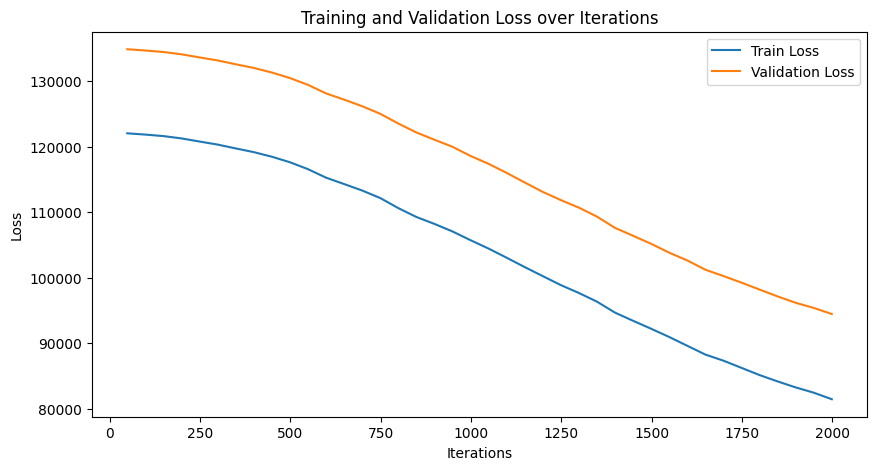

In [8]:
train_model(model, train_on_hot, val_on_hot, 0.01)